## Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import random
import matplotlib.image as mpimg
import splitfolders
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.models import Sequential
from keras import models
from keras.layers import Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from IPython.display import SVG
from scipy import ndimage
import pathlib as Path
%matplotlib inline

## Initializing Data Paths

In [2]:
input_data_path =r'C:\Users\conm\Desktop\Stenosis-Project\Stenosis detection\input'

split_data_path = r'C:\Users\conm\Desktop\Stenosis-Project\Stenosis detection\input'

In [3]:
labels = pd.read_csv('labels.csv')
labels

,filename,xmin,ymin,xmax,ymax
0,14_029_7_0058.bmp,288.0,369.0,328.0,398.0
1,14_024_1_0052.bmp,166.0,160.0,202.0,202.0
2,14_095_2_0075.bmp,461.0,337.0,492.0,379.0
3,14_075_6_0035.bmp,128.0,136.0,189.0,158.0
4,14_081_7_0026.bmp,323.0,177.0,351.0,230.0
...,...,...,...,...,...
8322,14_031_8_0060.bmp,469.0,184.0,254.0,160.0
8323,14_088_8_0077.bmp,512.0,319.0,576.0,347.0
8324,14_095_7_0045.bmp,199.0,218.0,229.0,273.0
8325,14_051_6_0026.bmp,258.0,181.0,277.0,216.0


In [4]:
splitfolders.ratio(split_data_path, output="output", seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

In [5]:
# Extract xmin, ymin, xmax and ymax from the train_labels.csv file and store them in a list
label_dimensions = []
for i in range(len(labels)):
    label_dimensions.append([labels.iloc[i]['xmin'], labels.iloc[i]['ymin'], labels.iloc[i]['xmax'], labels.iloc[i]['ymax']])

# Scale the dimensions of the labels
label_dimensions_scaled = []
for i in range(len(label_dimensions)):
    label_dimensions_scaled.append([label_dimensions[i][0]/1000, label_dimensions[i][1]/1000, label_dimensions[i][2]/1000, label_dimensions[i][3]/1000])
label_dimensions_scaled

[[0.288, 0.369, 0.328, 0.398],
 [0.166, 0.16, 0.202, 0.202],
 [0.461, 0.337, 0.492, 0.379],
 [0.128, 0.136, 0.189, 0.158],
 [0.323, 0.177, 0.351, 0.23],
 [0.173, 0.26, 0.206, 0.325],
 [0.406, 0.201, 0.44, 0.232],
 [0.276, 0.187, 0.322, 0.22],
 [0.25, 0.215, 0.306, 0.249],
 [0.282, 0.131, 0.359, 0.192],
 [0.416, 0.147, 0.47, 0.183],
 [0.449, 0.215, 0.488, 0.243],
 [0.45, 0.228, 0.496, 0.267],
 [0.171, 0.118, 0.288, 0.148],
 [0.476, 0.255, 0.524, 0.336],
 [0.277, 0.277, 0.348, 0.309],
 [0.247, 0.458, 0.306, 0.49],
 [0.181, 0.247, 0.208, 0.283],
 [0.3, 0.209, 0.387, 0.266],
 [0.382, 0.097, 0.409, 0.133],
 [0.216, 0.459, 0.276, 0.496],
 [0.314, 0.356, 0.362, 0.466],
 [0.235, 0.153, 0.267, 0.178],
 [0.361, 0.139, 0.377, 0.159],
 [0.196, 0.247, 0.217, 0.274],
 [0.23, 0.176, 0.27, 0.19],
 [0.205, 0.194, 0.24, 0.249],
 [0.051, 0.355, 0.084, 0.401],
 [0.481, 0.258, 0.551, 0.318],
 [0.139, 0.23, 0.18, 0.27],
 [0.108, 0.04, 0.139, 0.08],
 [0.467, 0.338, 0.53, 0.377],
 [0.22, 0.23, 0.253, 0.284],


In [6]:
# Extract the image names from the train_labels.csv file and store them in a list
filenames = []
for i in range(len(labels)):
    filenames.append(labels.iloc[i]['filename'])
filenames

['14_029_7_0058.bmp',
 '14_024_1_0052.bmp',
 '14_095_2_0075.bmp',
 '14_075_6_0035.bmp',
 '14_081_7_0026.bmp',
 '14_081_3_0023.bmp',
 '14_021_32_0030.bmp',
 '14_023_4_0063.bmp',
 '14_096_4_0057.bmp',
 '14_062_2_0070.bmp',
 '14_007_10_0062.bmp',
 '14_048_5_0034.bmp',
 '14_007_3_0081.bmp',
 '14_096_5_0057.bmp',
 '14_088_2_0036.bmp',
 '14_087_1_0045.bmp',
 '14_095_4_0054.bmp',
 '14_048_2_0045.bmp',
 '14_062_2_0045.bmp',
 '14_021_35_0009.bmp',
 '14_095_4_0052.bmp',
 '14_064_2_0061.bmp',
 '14_002_8_0024.bmp',
 '14_042_3_0023.bmp',
 '14_048_2_0059.bmp',
 '14_050_10_0041.bmp',
 '14_095_7_0065.bmp',
 '14_096_2_0055.bmp',
 '14_084_6_0047.bmp',
 '14_010_1_0041.bmp',
 '14_021_16_0036.bmp',
 '14_080_2_0103.bmp',
 '14_010_6_0043.bmp',
 '14_095_2_0040.bmp',
 '14_024_3_0018.bmp',
 '14_094_3_0056.bmp',
 '14_088_8_0084.bmp',
 '14_084_5_0032.bmp',
 '14_051_6_0020.bmp',
 '14_023_2_0105.bmp',
 '14_024_6_0027.bmp',
 '14_039_5_0067.bmp',
 '14_031_6_0045.bmp',
 '14_095_4_0044.bmp',
 '14_085_4_0047.bmp',
 '14_

In [8]:
# Load the train data
train_data = []
for i in range(len(filenames)):
    imagePath = os.path.sep.join([r'C:\Users\conm\Desktop\Stenosis-Project\output\train\stenosis', f'{filenames[i]}'])
    image = cv2.imread(imagePath)
    train_data.append(image)
# train_data
# View the first image in the train data
plt.imshow(train_data[0])


KeyboardInterrupt: 

In [ ]:
# Load the test data
test_data = []
for i in range(len(filenames)):
    imagePath = os.path.sep.join([r'C:\Users\conm\Desktop\Stenosis-Project\output\test\stenosis', f'{filenames[i]}'])
    image = cv2.imread(imagePath)
    test_data.append(image)
# test_data
# View the first image in the test data
plt.imshow(test_data[0])


## Visualize Data

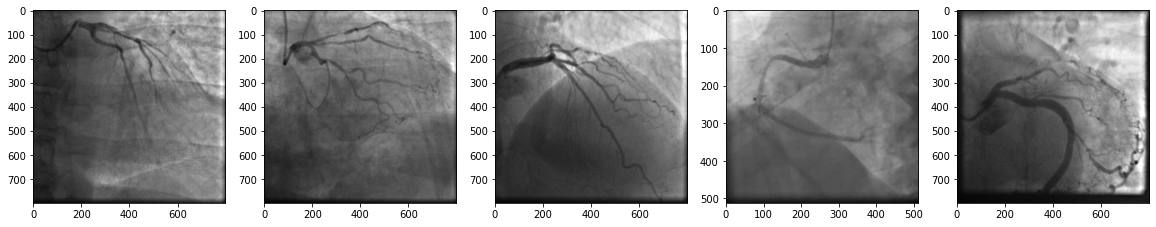

In [20]:
plt.figure(figsize=(20,20))

for i in range(5):
    file_name = random.choice(os.listdir(input_data_path))
    data_image_path= os.path.join(input_data_path, file_name)
    image=mpimg.imread(data_image_path)
    ax=plt.subplot(1,5,i+1)
    plt.imshow(image)

## Split Dataset

Image Augmentation

In [9]:
# Rotation of images to 180 degrees through the use of a list comprehension.
rotated_train_img = np.array([ndimage.rotate(
    train_rotate_imgs, angle=180) for train_rotate_imgs in output_train_data_path])
rotated_test_img = np.array([ndimage.rotate(
    test_rotate_imgs, angle=180) for test_rotate_imgs in normalized_test_img])
plt.imshow(rotated_train_img[0])

ValueError: input array should be at least 2D

## Training Model

In [ ]:
# load the VGG16 network, ensuring the head FC layers are left off
vgg = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# freeze all VGG layers so they will *not* be updated during the
# training process
vgg.trainable = False
# flatten the max-pooling output of VGG
flatten = vgg.output
flatten = Flatten()(flatten)
# construct a fully-connected layer header to output the predicted
# bounding box coordinates
bboxHead = Dense(128, activation="relu")(flatten)
bboxHead = Dense(64, activation="relu")(bboxHead)
bboxHead = Dense(32, activation="relu")(bboxHead)
bboxHead = Dense(4, activation="sigmoid")(bboxHead)
# construct the model we will fine-tune for bounding box regression
model = Model(inputs=vgg.input, outputs=bboxHead)

2022-07-11 20:40:09.129267: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nevillemthw/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-07-11 20:40:09.129809: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-11 20:40:09.130780: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Neville-PC): /proc/driver/nvidia/version does not exist
2022-07-11 20:40:09.133193: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
# initialize the optimizer, compile the model, and show the model
# summary
opt = Adam(lr='le-4')
model.compile(loss="mse", optimizer=opt)
print(model.summary())
# train the network for bounding box regression
print("[INFO] training bounding box regressor...")
H = model.fit(
	trainImages, trainTargets,
	validation_data=(testImages, testTargets),
	batch_size=32,
	epochs=25,
	verbose=1)